# It's time to work with the Iris Data

In [1]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
iris.DESCR

'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n    :Missi

In [2]:
X = iris.data 
y = iris.target


#### What is the size of our feature space?

In [3]:
X.shape

(150, 4)

Answer: 

#### How many categories does Iris data have? How many observations?

In [17]:
#150 observations and 4 categories
print np.unique(y)


[0 1 2]


Answer: 

#### Use two principal components and visualize your categories based on these two components. 

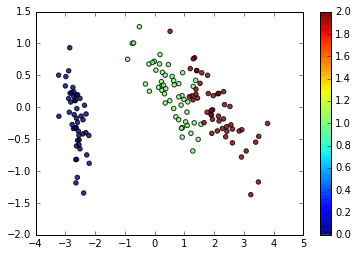

In [16]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_flowers = pca.fit_transform(X)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_flowers[:, 0], X_flowers[:, 1],c=y, alpha=0.8)
plt.colorbar();

#### Based on what you visualized, does it look like that we your categories can be seperated using a classification algorithm?

Answer: Yes

#### Draw a graph for percentage of Variance explained. 

[ 0.92461621  0.05301557  0.01718514  0.00518309]


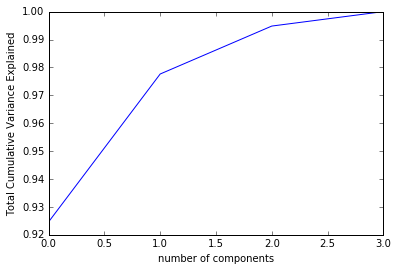

In [25]:
AllPCAs = PCA().fit(X)
print AllPCAs.explained_variance_ratio_
plt.xlabel('number of components')
plt.ylabel('Total Cumulative Variance Explained')
plt.plot(np.cumsum(AllPCAs.explained_variance_ratio_))



#### Based on your graph how many Principal components can capture orme than 97% of variability in your data?

Answer: 1

#### Use the number you mentioned above and transform your X variable by those many Principal Components. Once you do so, use a KNN algorithm and tune it to get the minimum misclassification error.

In [29]:
from sklearn import neighbors, metrics
from sklearn.cross_validation import cross_val_score
misclass = []
clf = PCA(1)
X_trans = clf.fit_transform(X)
for i in range(1,9):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_trans,y)
    MisClassificationError = 1 - (cross_val_score(knn,X_trans,y,cv=10).mean())
    misclass.append(MisClassificationError)
    print i, MisClassificationError
print min(misclass)


1 0.113333333333
2 0.126666666667
3 0.1
4 0.0933333333333
5 0.0733333333333
6 0.08
7 0.0733333333333
8 0.08
0.0733333333333
